##### _Data Visualization with Python_
---

## Line Plot (Line Chart)

A line plot, also known as a line chart, displays data as a series of points connected by straight line segments. It's a fundamental chart type used to visualize trends and changes in data over a continuous interval, most commonly *time*. The independent variable (often time) is plotted on the x-axis, and the dependent variable is plotted on the y-axis.

### Suitable Variable Types
* **X-axis (Independent Variable):** Usually a continuous variable, most often representing time (e.g., years, months, days) or another ordered quantity. Can be ordinal or interval/ratio level data. While less common, the x-axis *could* represent categories if those categories have a clear, inherent order (e.g., stages of a process), but a bar chart is often better in those cases.
* **Y-axis (Dependent Variable):** Typically a numerical variable (interval or ratio level data). The y-axis shows the value of the variable that is changing in response to the independent variable.

### Use Cases
1. **Showing Trends Over Time (Time Series Data):** This is the most common use case. Examples include:
    * Stock prices over days, months, or years.
    * Temperature fluctuations over a period.
    * Population growth over time.
    * Company revenue or profit over quarters or years.
    * Website traffic over days or weeks.
2. **Visualizing Continuous Changes:** Line plots are effective for showing how a variable changes continuously in response to another, even if the independent variable isn't strictly time. Examples include:
    * The relationship between speed and fuel efficiency of a car.
    * The change in a chemical reaction rate with increasing temperature.
    * The growth of a plant in relation to the amount of sunlight it receives.
3. **Comparing Multiple Series:** Line plots can display multiple lines on the same graph, making it easy to compare trends across different groups or categories.  For example:
    * Comparing the stock prices of several different companies.
    * Tracking the sales of different product lines over time.
    * Comparing the growth rates of different populations.
4. **Highlighting Patterns:** Can show patterns, fluctuations, increases, decreases, and rates of change.

### Potential Pitfalls
1. **Misleading Scales:**  The choice of scale on the y-axis can dramatically alter the perception of the trend.  A truncated y-axis (not starting at zero) can exaggerate changes, while an overly wide y-axis range can minimize them.  It's crucial to choose scales thoughtfully and ethically.  Always consider starting at zero unless there's a very strong and justifiable reason not to.
2. **Overplotting (Too Many Lines):** If you plot too many lines on the same graph, it can become cluttered and difficult to interpret.  Consider using separate plots, small multiples, or interactive features (like tooltips or toggles) to handle many series.
3. **Interpolation Issues:** The straight lines connecting data points *imply* a continuous trend, even if the underlying data is only collected at discrete intervals.  Be cautious about interpreting values *between* the plotted points, especially if the data is sparse or the underlying phenomenon isn't truly continuous.
4. **Ignoring Irregular Intervals:** If the data points are *not* evenly spaced along the x-axis (e.g., unevenly spaced time intervals), a standard line plot can be misleading.  It will visually distort the rate of change.  In such cases, consider a scatter plot with connected points, or explicitly indicate the uneven intervals.
5. **Extrapolation:** Extending a trend line beyond the observed time frame.
6. **Causation vs Correlation:** Easy to assume causation.

### How to Create Line Plots?

#### Creating a Dummy Database:

In [1]:
import pandas as pd
import numpy as np

# --- Synthetic Data: Stock Prices ---
np.random.seed(42)
n = 100  # Number of days
dates = pd.date_range(start="2023-01-01", periods=n, freq="D")  # Daily dates
company_a = 100 + np.cumsum(np.random.randn(n) * 2)  # Simulate stock price with random walk
company_b = 120 + np.cumsum(np.random.randn(n) * 1.5)  # Simulate another stock price

df_stocks = pd.DataFrame({'Date': dates, 'Company A': company_a, 'Company B': company_b})
df_stocks = df_stocks.set_index('Date') # Set 'Date' as index

df_stocks.head()

,Company A,Company B
Date,,
2023-01-01,100.993428,117.876944
2023-01-02,100.716900,117.245976
2023-01-03,102.012277,116.731904
2023-01-04,105.058336,115.528488
2023-01-05,104.590030,115.286560


#### Line Plots with Matplotlib:

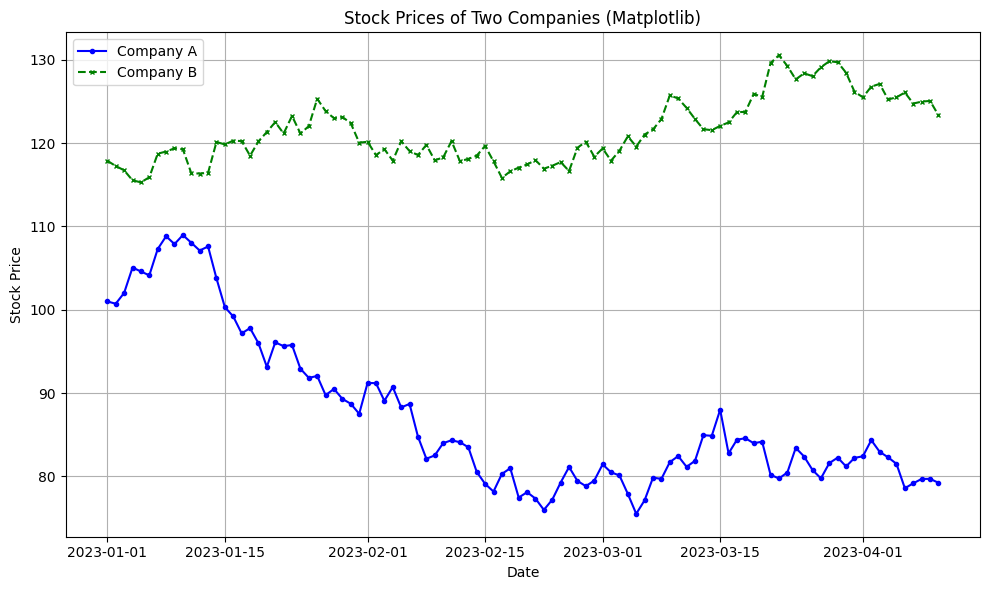

In [2]:
import matplotlib.pyplot as plt

# --- Matplotlib ---
plt.figure(figsize=(10, 6))
plt.plot(df_stocks.index, df_stocks['Company A'], label='Company A', color='blue', marker='o', markersize=3, linestyle='-')
plt.plot(df_stocks.index, df_stocks['Company B'], label='Company B', color='green', marker='x', markersize=3, linestyle='--')

plt.title('Stock Prices of Two Companies (Matplotlib)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()  # Show the legend
plt.tight_layout() # Prevents labels overlapping
plt.show()

#### Line Plots with Seaborn:

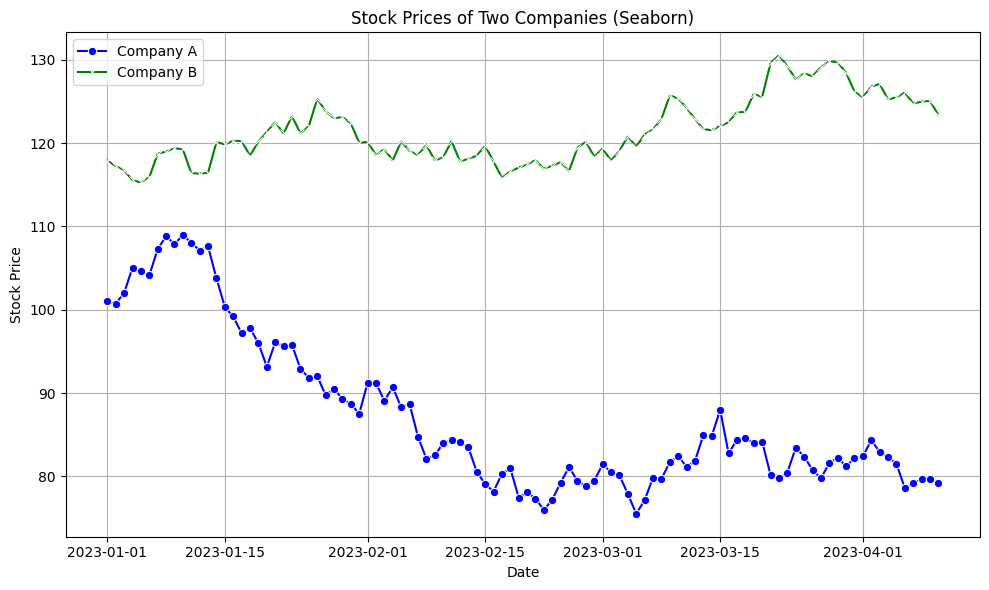

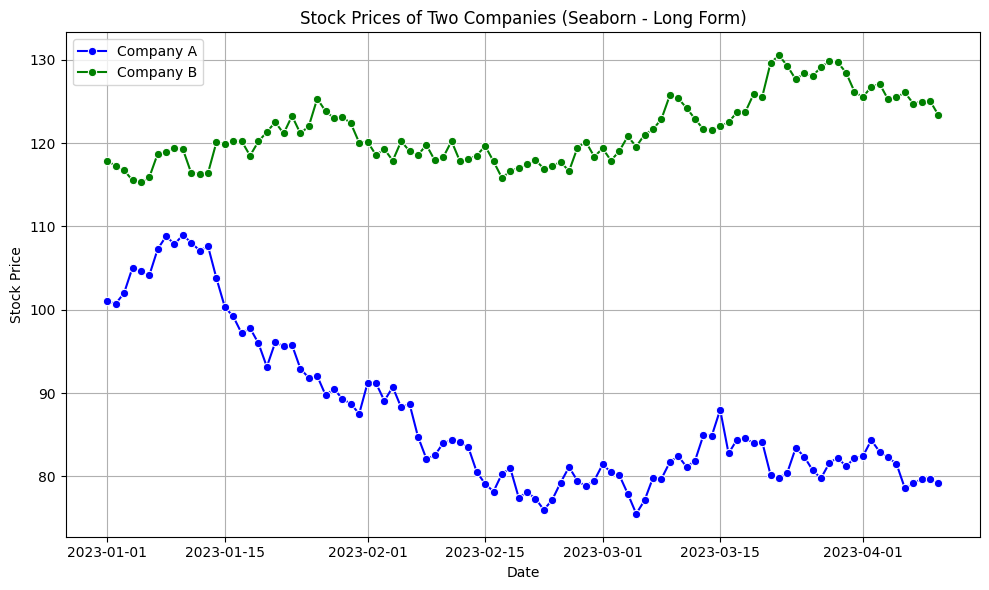

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Seaborn ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_stocks, x=df_stocks.index, y='Company A', label='Company A', color='blue', marker='o')
sns.lineplot(data=df_stocks, x=df_stocks.index, y='Company B', label='Company B', color='green', marker='x')

plt.title('Stock Prices of Two Companies (Seaborn)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Alternative Seaborn (using Pandas melt for long-form data)
df_stocks_long = df_stocks.reset_index().melt(id_vars='Date', value_vars=['Company A', 'Company B'], var_name='Company', value_name='Price')

plt.figure(figsize=(10,6))
sns.lineplot(data = df_stocks_long, x = "Date", y = "Price", hue = "Company", marker = "o", palette=['blue', 'green'])
plt.title('Stock Prices of Two Companies (Seaborn - Long Form)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()